1. 비선형 활성화 함수 3가지(시그모이드, 하이퍼볼릭 탄젠트, 렐루)를 정의하고 -10부터 10까지의 값 100개를 생성한 뒤 입력값으로 사용하여 비선형 활성화 함수를 적용한 값 출력해보세요.

2. 다층 퍼셉트론을 활용하여 선형적으로 분리되지 않는 데이터를 분류하는 모델을 구현해보세요.
• XOR 문제와는 다른 비선형 데이터셋(예: make_moons 또는 make_circles 활용)을 생성하여 분류
• 입력층, 은닉층(활성화 함수 포함), 출력층을 구성하여 MLP 설계

3. 간단한 CNN(Convolutional Neural Network)을 구성하여 가상 데이터(또는 MNIST 등 간단한 데이터셋)를 분류해보세요.

## 1번 문제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# activation finction definition
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

In [ ]:
# x, y값
x = np.arange(-10, 10, 0.2)

y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)

print(f'output_sigmoid : \n', y_sigmoid[::5])
print(f'output_tanh : \n',y_tanh[::5])
print(f'output_relu : \n',y_relu[::5])

output_sigmoid : 
 [4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01]
output_tanh : 
 [-9.99999996e-01 -9.99999970e-01 -9.99999775e-01 -9.99998337e-01
 -9.99987712e-01 -9.99909204e-01 -9.99329300e-01 -9.95054754e-01
 -9.64027580e-01 -7.61594156e-01 -3.55271368e-14  7.61594156e-01
  9.64027580e-01  9.95054754e-01  9.99329300e-01  9.99909204e-01
  9.99987712e-01  9.99998337e-01  9.99999775e-01  9.99999970e-01]
output_relu : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


<Figure size 1000x600 with 0 Axes>

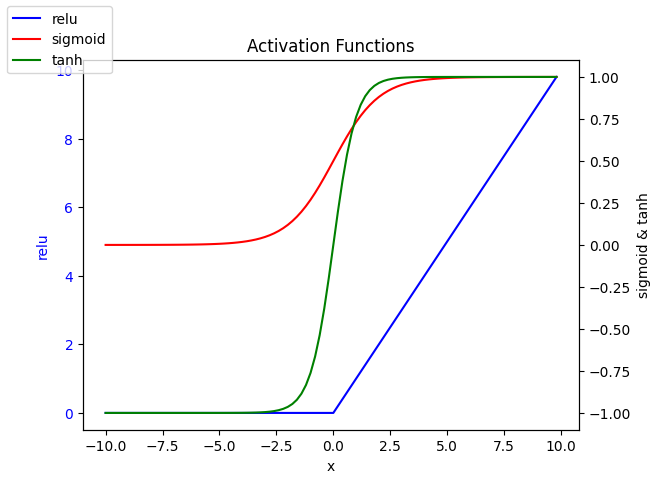

In [ ]:
# visualize
def visualize_activation(x, y_sigmoid, y_tanh, y_relu):
    plt.figure(figsize=(10, 6))
    # plot 중첩
    fig, ax1 = plt.subplots()  # 1차 y축을 가진 axes 객체 생성

    ax1.plot(x, y_relu, label='relu', color='blue')  # relu는 1차 y축에 파란색으로 표시
    ax1.set_xlabel('x')
    ax1.set_ylabel('relu', color='blue')
    ax1.tick_params('y', labelcolor='blue')  # 1차 y축 눈금 색상 설정

    ax2 = ax1.twinx()  # 2차 y축을 가진 axes 객체 생성, x축 공유

    ax2.plot(x, y_sigmoid, label='sigmoid', color='red')  # sigmoid는 2차 y축에 빨간색으로 표시
    ax2.plot(x, y_tanh, label='tanh', color='green')  # tanh는 2차 y축에 초록색으로 표시
    ax2.set_ylabel('sigmoid & tanh', color='black')  # 2차 y축 눈금 색상 설정
    ax2.tick_params('y', labelcolor='black')  # 2차 y축 눈금 색상 설정

    # 그래프 설정
    plt.title('Activation Functions')
    fig.legend(loc='upper left')  # 범례 위치 조정
    plt.show()
visualize_activation(x, y_sigmoid, y_tanh, y_relu)

## 2번 문제

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터셋 생성(make_moons)
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 모델 정의
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# 모델 인스턴스 생성
input_size = 2
hidden_size = 16
output_size = 2
model = MLP(input_size, hidden_size, output_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류에 적합한 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 모델 학습
num_epochs = 100
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 성능 평가
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    total = y_test.size(0)
    correct = (predicted == y_test).sum().item()
    print(f'Accuracy of the model on the test data: {100 * correct / total}%')

Epoch [10/100], Loss: 0.5596
Epoch [20/100], Loss: 0.4085
Epoch [30/100], Loss: 0.3063
Epoch [40/100], Loss: 0.2613
Epoch [50/100], Loss: 0.2330
Epoch [60/100], Loss: 0.2137
Epoch [70/100], Loss: 0.1996
Epoch [80/100], Loss: 0.1866
Epoch [90/100], Loss: 0.1730
Epoch [100/100], Loss: 0.1592
Accuracy of the model on the test data: 92.5%


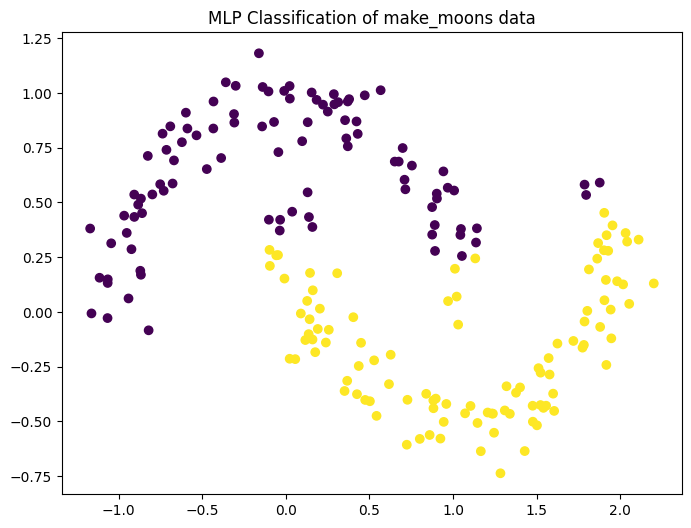

In [ ]:
# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted, cmap='viridis')
plt.title('MLP Classification of make_moons data')
plt.show()

## 3번 문제

간단한 CNN(Convolutional Neural Network)을 구성하여 가상 데이터(또는 MNIST 등 간단한 데이터셋)를 분류해보세요.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# 데이터셋을 불러올 때 적용할 변형(transform) 정의
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR-10 훈련 데이터셋과 테스트 데이터셋 불러오기
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# 클래스 레이블 정의 (10-classes)
classes = ('plane', 'car', 'bird', 'cat','deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:13<00:00, 12.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import torch

# GPU 사용 가능 여부 확인
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU 사용 가능")
else:
    device = torch.device("cpu")
    print("GPU 사용 불가능, CPU 사용")

GPU 사용 가능


In [ ]:
import torch.nn as nn
import torch.nn.functional as F # torch.nn과 동일한 기능

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 input channels (RGB), 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # Adjust input size based on image dimensions and pooling
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # 10 classes
        self.Flatten = nn.Flatten()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.Flatten(x) # 1차원 텐서로 변환 : FCNN을 위해
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def compile(self):
        self.optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        self.criterion = nn.CrossEntropyLoss() # multiple-classes

    def train(self, trainloader, epochs):
        losses = []
        for epoch in range(epochs):
            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                self.optimizer.zero_grad()
                outputs = self(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                running_loss += loss.item()
            losses.append(running_loss / len(trainloader))
            print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}')
        return losses

    def eval(self):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = self(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Test Accuracy: {accuracy * 100:.2f}%')

In [ ]:
model = CNN().to(device)
model.compile()
losses = model.train(trainloader, epochs=15)
model.eval()

Epoch 1, Loss: 1.5418254062616825
Epoch 2, Loss: 1.3025649282884597
Epoch 3, Loss: 1.2008341123972832
Epoch 4, Loss: 1.131820270192325
Epoch 5, Loss: 1.0820096376313268
Epoch 6, Loss: 1.0474861450294777
Epoch 7, Loss: 1.0180874004153535
Epoch 8, Loss: 0.9873875286795013
Epoch 9, Loss: 0.9694885763245004
Epoch 10, Loss: 0.9461929905391683
Epoch 11, Loss: 0.9316555955786509
Epoch 12, Loss: 0.9145871272847289
Epoch 13, Loss: 0.8946217295665734
Epoch 14, Loss: 0.8879569798101206
Epoch 15, Loss: 0.8713521745479595
Test Accuracy: 61.70%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

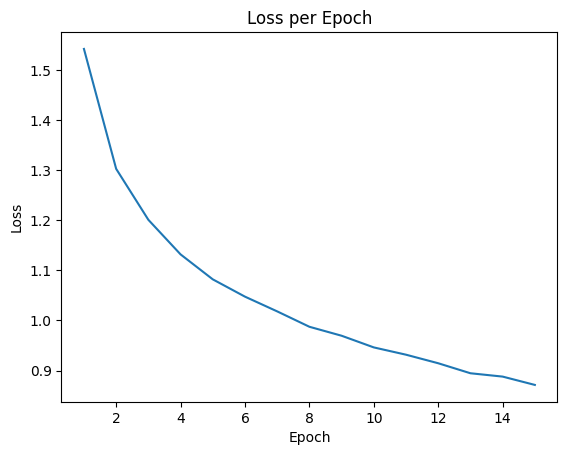

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(losses) + 1), losses)
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()